# ECE1390/2390 Homework #3
Due 9/30/2025

## Problem 1.

The image of the Pitt Cathedral (data/Cathedral_noisy.jpg) has been contaminated with salt & pepper noise.  
* Implement two different types of filters to remove the salt and pepper noise.
* Show the two filtered images

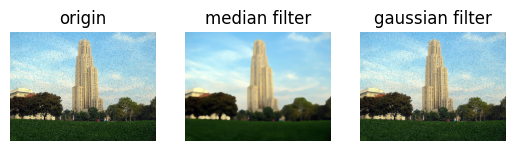

In [41]:
import cv2
import os
import matplotlib.pyplot as plt
img = cv2.imread(os.path.relpath('data/Cathedral_noisy.jpg'), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def apply_median_filter(image, kernel_size=15):
    return cv2.medianBlur(image, kernel_size)
def apply_gaussian_filter(image, kernel_size=(5, 5), sigma=0):
        return cv2.GaussianBlur(image, kernel_size, sigma)


median_filtered_img = apply_median_filter(img)


g_filtered_img = apply_gaussian_filter(img)
plt.subplot(131)
plt.imshow(img)
plt.title('origin')
plt.axis('off')


plt.subplot(132)
plt.imshow(median_filtered_img)
plt.title('median filter')
plt.axis('off')
plt.subplot(133)
plt.imshow(g_filtered_img)
plt.title('gaussian filter')
plt.axis('off')
plt.show()

## Problem 2.
I recently went on a trip to Alaska and afterward discovered that all of my photos had a smudge on the camera lens.

Using inpainting methods, try to remove the smudge from the image data/Alaska.jpg as shown below


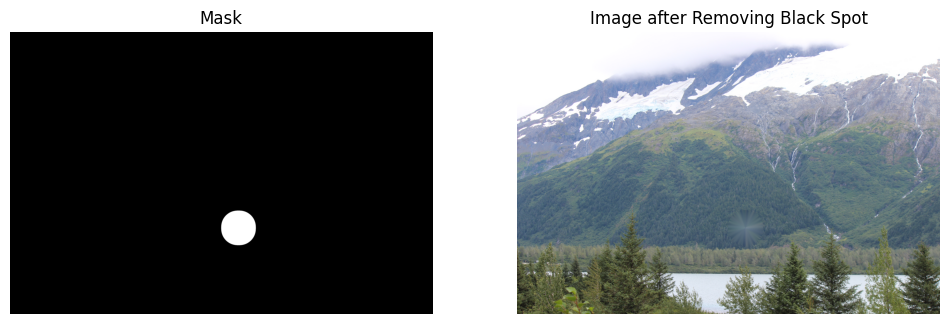

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread(os.path.relpath('data/Alaska.jpg'), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


cv2.circle(img, (2800, 2400), 200, (0, 0, 0), thickness=-1, lineType=cv2.LINE_AA)


_, mask = cv2.threshold(img[:, :, 0], 10, 255, cv2.THRESH_BINARY_INV)


mask = cv2.medianBlur(mask, 7)


kernel = np.ones((25, 25), np.uint8)
mask_dilated = cv2.dilate(mask, kernel)


img_inpainted = cv2.inpaint(img, mask_dilated, inpaintRadius=3, flags=cv2.INPAINT_TELEA)


plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(mask_dilated, cmap='gray')
plt.title('Mask')
plt.axis('off')

# 显示修复后的图像
plt.subplot(122)
plt.imshow(img_inpainted)
plt.title('Image after Removing Black Spot')
plt.axis('off')

plt.show()

## Problem 3
 
Using an edge detection filter of your choice, 

* seperate the image of the US Steel building into two images that are mostly horizontal and mostly vertical edges.  Display these two images 

* Create a 3D numpy array to hold the image of the building in the green channel position. Put the vertical edge mask image in the red channel and the horzontal edge in the blue channel and display.


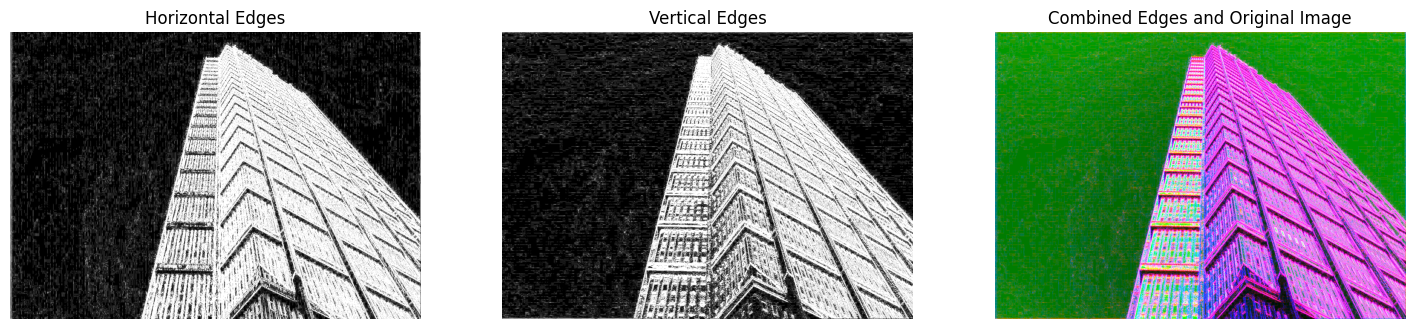

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread(os.path.relpath('data/USSteel_building.jpg'), cv2.IMREAD_GRAYSCALE)


sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5) 
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)  


sobel_x_abs = cv2.convertScaleAbs(sobel_x)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)


height, width = img.shape
combined_img = np.zeros((height, width, 3), dtype=np.uint8)


combined_img[:, :, 1] = img
combined_img[:, :, 0] = sobel_y_abs
combined_img[:, :, 2] = sobel_x_abs


plt.figure(figsize=(18, 6))


plt.subplot(131)
plt.imshow(sobel_x_abs, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')


plt.subplot(132)
plt.imshow(sobel_y_abs, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(133)
plt.imshow(combined_img)
plt.title('Combined Edges and Original Image')
plt.axis('off')

plt.show()

## Problem 4
For the same image of the US Steel building used in problem 3, 

* Implement the two types of  Laplace (2nd derivative) edge detection kernels presented in lecture 7

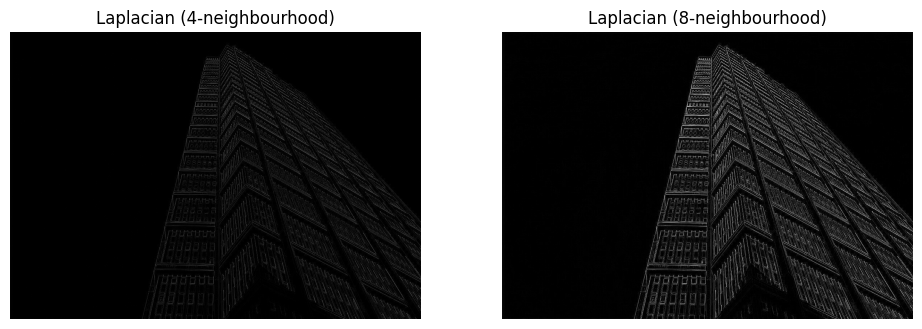

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread(os.path.relpath('data/USSteel_building.jpg'), cv2.IMREAD_GRAYSCALE)




laplacian_kernel_4 = np.array([[0, -1, 0],
                               [-1, 4, -1],
                               [0, -1, 0]])


laplacian_kernel_8 = np.array([[-1, -1, -1],
                               [-1, 8, -1],
                               [-1, -1, -1]])


laplacian_4 = cv2.filter2D(img, -1, laplacian_kernel_4)


laplacian_8 = cv2.filter2D(img, -1, laplacian_kernel_8)


plt.figure(figsize=(18, 6))



plt.subplot(132)
plt.imshow(laplacian_4, cmap='gray')
plt.title('Laplacian (4-neighbourhood)')
plt.axis('off')


plt.subplot(133)
plt.imshow(laplacian_8, cmap='gray')
plt.title('Laplacian (8-neighbourhood)')
plt.axis('off')

plt.show()

## Problem 5.  [ECE 2390 only]

Using the Gaussian Mixture model example presented in lecture 8, expand/rewrite the code to allow for three color clusters.  Then apply the model to segment the Pitt Seal image shown below


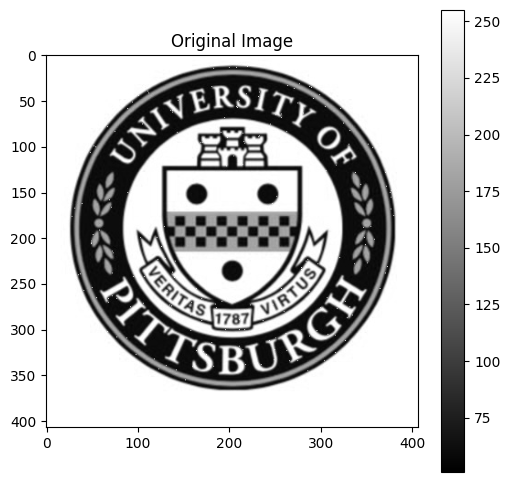

Iteration=0 Means=[75.22, 178.03, 253.20] Sigmas=[23.11, 19.04, 5.36]
Iteration=1 Means=[72.58, 180.25, 253.99] Sigmas=[19.73, 27.52, 2.87]
Iteration=2 Means=[69.98, 182.10, 254.42] Sigmas=[16.30, 35.76, 1.44]
Iteration=3 Means=[67.81, 182.42, 254.59] Sigmas=[13.27, 42.20, 0.92]
Iteration=4 Means=[66.08, 182.22, 254.69] Sigmas=[10.68, 47.28, 0.70]
Iteration=5 Means=[64.74, 181.92, 254.76] Sigmas=[8.53, 51.09, 0.56]
Iteration=6 Means=[63.74, 181.43, 254.80] Sigmas=[6.86, 53.87, 0.49]
Iteration=7 Means=[62.99, 181.85, 254.85] Sigmas=[5.60, 56.28, 0.39]
Iteration=8 Means=[62.40, 181.20, 254.88] Sigmas=[4.59, 58.02, 0.33]
Iteration=9 Means=[61.95, 179.88, 254.88] Sigmas=[3.79, 59.36, 0.32]
Iteration=10 Means=[61.62, 178.40, 254.89] Sigmas=[3.20, 60.40, 0.32]
Iteration=11 Means=[61.39, 177.07, 254.89] Sigmas=[2.81, 61.21, 0.32]
Iteration=12 Means=[61.24, 175.99, 254.89] Sigmas=[2.56, 61.81, 0.32]
Iteration=13 Means=[61.14, 175.20, 254.89] Sigmas=[2.39, 62.24, 0.32]
Iteration=14 Means=[61.08

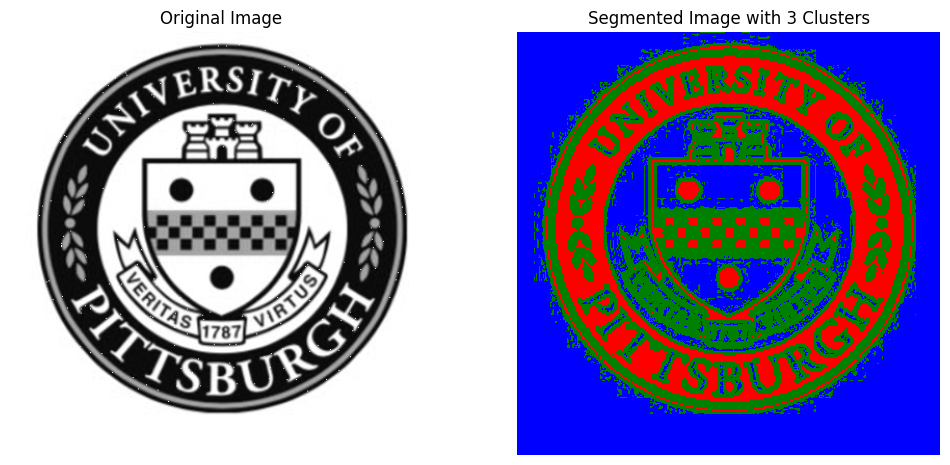

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


from matplotlib.colors import ListedColormap
binary_cmap = ListedColormap(['red', 'green', 'blue'])

class Gaussian:
 
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = abs(sigma)
    def pdf(self, data):
    
        s = (data - self.mu) / self.sigma
        return 1 / (np.sqrt(2 * np.pi) * self.sigma) * np.exp(-s ** 2 / 2)

def Expectation_Step(data, Gdist1, Gdist2, Gdist3):

    prob1 = Gdist1.pdf(data)
    prob2 = Gdist2.pdf(data)
    prob3 = Gdist3.pdf(data)

    total_prob = prob1 + prob2 + prob3


    return prob1 / total_prob, prob2 / total_prob, prob3 / total_prob

def Maximization_Step(data, prob1, prob2, prob3):

    mu1 = np.sum(data * prob1) / np.sum(prob1)
    mu2 = np.sum(data * prob2) / np.sum(prob2)
    mu3 = np.sum(data * prob3) / np.sum(prob3)

    sigma1 = np.sqrt(np.sum(prob1 * (data - mu1) ** 2) / np.sum(prob1))
    sigma2 = np.sqrt(np.sum(prob2 * (data - mu2) ** 2) / np.sum(prob2))
    sigma3 = np.sqrt(np.sum(prob3 * (data - mu3) ** 2) / np.sum(prob3))

    return Gaussian(mu1, sigma1), Gaussian(mu2, sigma2), Gaussian(mu3, sigma3)


im = cv2.imread('data/Pitt_Seal.jpg', cv2.IMREAD_GRAYSCALE)




G1 = Gaussian(50, 20)
G2 = Gaussian(150, 20)
G3 = Gaussian(200, 20)


prob1, prob2, prob3 = Expectation_Step(im, G1, G2, G3)


membership = np.argmax(np.stack((prob1, prob2, prob3), axis=0), axis=0)


G1, G2, G3 = Maximization_Step(im, prob1, prob2, prob3)




for iter in range(20):
    # E
    prob1, prob2, prob3 = Expectation_Step(im, G1, G2, G3)
    # M
    G1, G2, G3 = Maximization_Step(im, prob1, prob2, prob3)
    #print(f'Iteration={iter} Means=[{G1.mu:.2f}, {G2.mu:.2f}, {G3.mu:.2f}] Sigmas=[{G1.sigma:.2f}, {G2.sigma:.2f}, {G3.sigma:.2f}]')


membership = np.argmax(np.stack((prob1, prob2, prob3), axis=0), axis=0)


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(membership, cmap=binary_cmap)
plt.title("Segmented Image with 3 Clusters")
plt.axis('off')

plt.show()

